In [2]:
import analytics

In [69]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
top100 = analytics.cleaned_dataset()

In [1]:
top100coins = top100[top100['Date'] == '2017-12-18'].sort_values('Market-Cap', ascending=False)
top100coins = top100coins[['Coin', 'Market-Cap']]
top100coins = pd.DataFrame(top100coins.values, columns=top100coins.columns)
top100coins.index += 1 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
top100coins.head(50)

totalMarketCap = top100coins["Market-Cap"].sum()
#totalMarketCap

NameError: name 'top100' is not defined

In [26]:
# Process:

# I. Analyse the entire market to come up with a list of tickers
#   1. Search for seasonality (monthly and weekly and annually)
#      - look at Christmas spike and January deflation
#   2. Look at the correlation matrix
#      - see which go together and when
#      - look for the lag behind different coins, i.e. is eth correlated with btc + 1day?
# 
#   3. Group by sectors 
#   5. Group by market cap
#   6. Calculate volatilty 
#   7. Plot the volatility profile of the market
#   8. Plot the volatility profile different coins
#   9. How many coins % of total have EVER doubled their price = pump
#  10. Look at new comers in top 100!
#  11. See price increase of poloniex exchange coins from beginning of listing
#  12. Pace of new account openings

# II. Analyse a portfolio of coins coming up from 1.
#   1. Backtesting monthly, weekly, daily
#   2. Look for correlation matrix and volatilty of the portfolio
#   3. 

# III. Individual coin analysis
#   1. look at full history of price (search for pumps and dumps)
#       - vs USD and vs BTC
#   2. look at recent history of price (search for pumps and dumps)
#       - vs USD and vs BTC
#   3. look at market cap (should be highly correlated with price)
#       - check for growth as % of entire market 
#       - check if you make money vs the market not vs the dollar
#       - otherwise you have opportunity cost
#       - need to have benchmark. 
#   4. look how it grows depending on exchange adoption
#   5. profile diff coins based on google trends, reddit, twitter
#   6. search for pumps as % of initial price so the pump is yet to come
#   7. find the average life of an altcoin (drop below issue price = death)
#   8. When it was adopted by exchange analysis

# IV. Investing strategy
#   1. Stop loss order
#   2. Cash out 
#   3. 



In [40]:
coin = top100coins.values[0][0]
coin
coindata = analytics.get_historical_data(top100, coin, '2017-01-18', '2017-12-18')


'bitcoin'

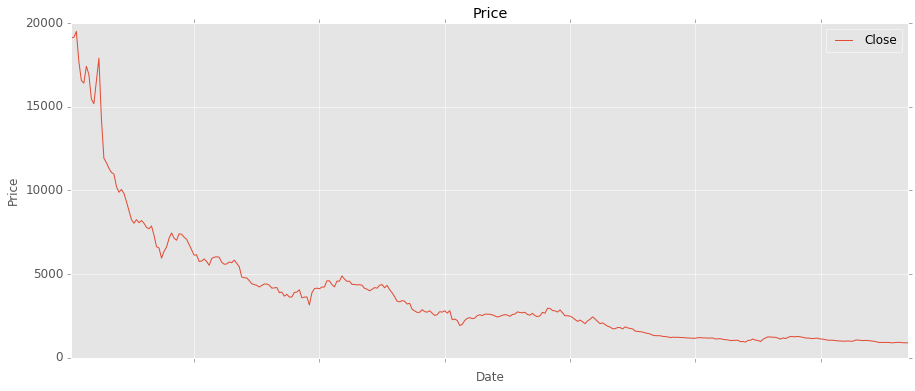

In [77]:
%matplotlib inline
plt.style.use('ggplot')
ax = coindata[['Close']].plot(kind='line', title ="Price",figsize=(15,6),legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Price",fontsize=12)
myFmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xticklabels(coindata[["Date"]], rotation=-45)

In [80]:
import datetime

In [129]:
d1 = coindata[["Date"]].values[0][0]
d1 = d1.astype('M8[D]')

In [127]:
top100coinstday = top100[top100['Date'] == '2017-12-18'].sort_values('Market-Cap', ascending=False)
top100coinsyday = top100[top100['Date'] == '2017-12-10'].sort_values('Market-Cap', ascending=False)

top100coinstday = top100coinstday[['Coin', 'Close']]
top100coinstday = pd.DataFrame(top100coinstday.values, columns=top100coins.columns)

top100coinsyday = top100coinsyday[['Coin', 'Close']]
top100coinsyday = pd.DataFrame(top100coinsyday.values, columns=top100coins.columns)

top100coinschg = pd.DataFrame(top100coinstday[["Coin"]])
top100coinschg["Change"] = top100coinstday["Close"] - top100coinstday["Close"]
top100coins.head(5)

,Coin,Close,Change
0,bitcoin,19114.200,19114.200
1,ethereum,794.640,794.640
2,bitcoin-cash,2196.640,2196.640
3,ripple,0.778,0.778
4,litecoin,358.340,358.340
